<a href="https://colab.research.google.com/github/Memo28/100DayofML/blob/master/Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


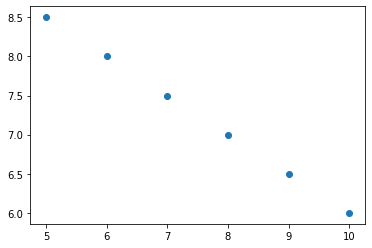

In [5]:
car_prices = [5, 6, 7, 8, 9, 10]
units_sold = [8.5, 8, 7.5, 7.0, 6.5, 6.0]

plt.scatter(car_prices, units_sold)

In [7]:
prices_array = np.array(car_prices).reshape(-1, 1)
units_array = np.array(units_sold).reshape(-1, 1)
units_array, prices_array

(array([[8.5],
        [8. ],
        [7.5],
        [7. ],
        [6.5],
        [6. ]]), array([[ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]))

In [9]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
units = torch.from_numpy(units_array).float()
prices, units

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), tensor([[8.5000],
         [8.0000],
         [7.5000],
         [7.0000],
         [6.5000],
         [6.0000]]))

tensor(0.0148, grad_fn=<MseLossBackward>)


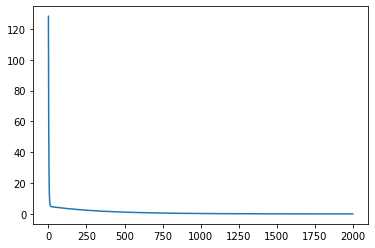

In [12]:
model = nn.Linear(1, 1)
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.015)

losses = []
iterations = 2000

for i in range(iterations):
  # Forwardpass
  # Create a prediction using the linear regression
  pred = model(prices)
  # Calculate the loss, firs param is the prediction and second is the units, to know how far or close is my predction in base of the real unit
  loss = loss_function(pred, units)
  losses.append(loss.data)

  #Backwardpass
  optimizer.zero_grad()
  # Backpropagation
  loss.backward()
  optimizer.step()

print(loss)
plt.plot(range(iterations), losses)

In [14]:
# Making a prediction
x = torch.Tensor([[4.0]])
p = model(x)
p

tensor([[8.7306]], grad_fn=<AddmmBackward>)